In [ ]:
#SIMPLE VECTOR CLASSIFIER
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [ ]:
x

array([[ 1.72136714,  1.79044652],
       [-1.92458803,  0.29257516],
       [ 0.09442789, -2.43680874],
       ...,
       [-1.09193773, -1.13375868],
       [-2.20642928,  0.20927255],
       [ 1.42210307, -2.27383783]])

In [ ]:
y

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,

<Axes: xlabel='0', ylabel='1'>

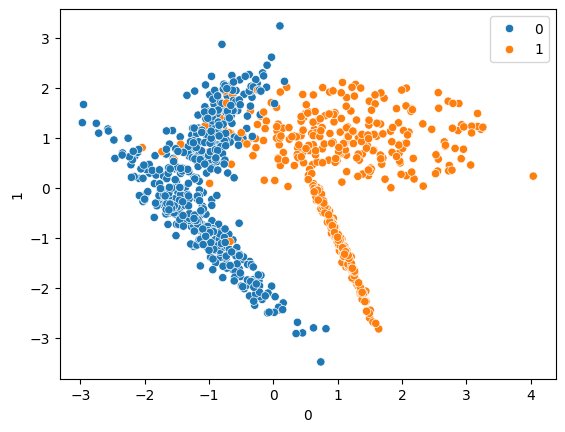

In [ ]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train

array([[-1.3430421 ,  1.84655091],
       [-1.44088544,  0.38704277],
       [-1.18085242, -0.16513025],
       ...,
       [-0.51357441, -1.70066043],
       [ 0.45348329, -2.8984465 ],
       [ 0.92708199,  0.91260363]])

In [ ]:
#model training
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)


SVC(kernel='linear')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#model evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.97      0.90      0.94       105

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
accuracy_score(y_test,y_pred)

0.935

In [ ]:
confusion_matrix(y_test,y_pred)

array([[92,  3],
       [10, 95]])

In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,0.2,1,2,3,10,50,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel':['linear']}


In [ ]:
grid=GridSearchCV(SVC(),param_grid=params,cv=5,verbose=2)

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.2, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
print(grid.best_score_)

0.94625


In [ ]:
y_pred=grid.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.935